In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd

nLoops = 5
nPoints = 100
os.chdir(r"C:\Users\Maxime\Desktop\Measurement 20181218\Recording_06")

In [2]:


SpectraNumber = nLoops*4*nPoints

Spectra = []
for j in range(0,SpectraNumber):
    FileNumber = str(19+j)
    FileNumber = FileNumber.rjust(9,'0')
    FileName = 'Spectrum'+FileNumber+'.csv'
    a = np.asarray(pd.read_csv(FileName))[33:-1,:].reshape(-1)
    a2 = np.asarray([a[i][17:] for i in range(a.shape[0])]).astype(float)
    Spectra.append(a2)
Spectra = np.asarray(Spectra)
WvsX = np.asarray([a[i][:16] for i in range(a.shape[0])]).astype(float)
Spectra=Spectra.reshape(nLoops,4*nPoints,-1)
Spectra = np.mean(Spectra,axis = 0)
Spectra.shape

(400, 3647)

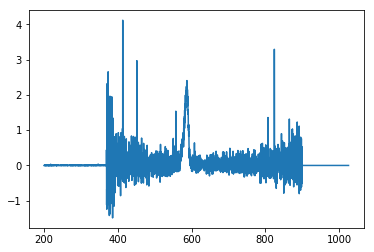

In [3]:
plt.plot(WvsX,Spectra[2,:])


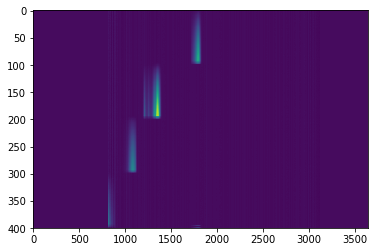

In [4]:
plt.imshow(Spectra[:,:], cmap = 'viridis', aspect = 'auto')


In [1]:
from scipy.signal import savgol_filter as savgol

Smoothed = savgol(Spectra, 61, 2, axis = -1)

NameError: name 'Spectra' is not defined

In [ ]:
#[plt.plot(Smoothed[i,:]) for i in range(64,84)]
Smoothed = Smoothed.reshape(4,nPoints,-1)

In [ ]:
[plt.plot(Smoothed[3,i,:]) for i in range(Smoothed.shape[1])]

In [2]:
[plt.plot(Smoothed.reshape(-1,Smoothed.shape[-1])[i,:]) for i in range(84)]

NameError: name 'plt' is not defined

In [9]:
#Smoothed = Smoothed[:,:-1,:]
Smoothed = Smoothed[:,:-7,:]

In [10]:
MaxesIndices = np.argmax(Smoothed[:,80,:],axis = -1)

Peaks = WvsX[MaxesIndices]
Peaks

array([586.8729858, 487.503479 , 427.8665466, 372.7921448])

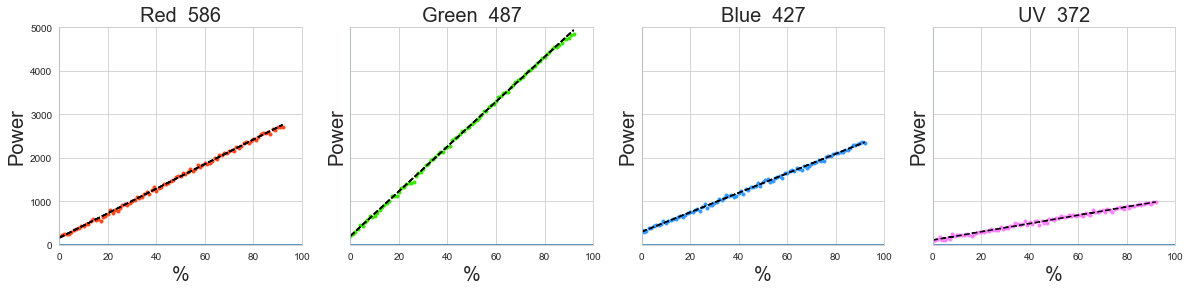

In [11]:
import seaborn as sns
sns.set_style('whitegrid')

from scipy.optimize import minimize

def linfunc(x,param):
    a,b = param
    return a+b*x

def linfunc_error(param,x,y):
    """x is current, param is a vector of length 2, y is all luminescence values"""
    y_pred = linfunc(x,param)
    return np.sum((y-y_pred)**2)

x0 = [1,1] # initial guess for a,b
args = (np.arange(1,94),np.sum(Smoothed[0,:,:],axis=-1))
argss = (np.arange(1,94),np.sum(Smoothed[1,:,:],axis=-1))
argsss = (np.arange(1,94),np.sum(Smoothed[2,:,:],axis=-1))
argssss = (np.arange(1,94),np.sum(Smoothed[3,:,:],axis=-1))


RedSolution = minimize(linfunc_error, x0 = x0, args = args).x
GreenSolution = minimize(linfunc_error, x0 = x0, args = argss).x
BlueSolution = minimize(linfunc_error, x0 = x0, args = argsss).x
UVSolution = minimize(linfunc_error, x0 = x0, args = argssss).x



fig,ax = plt.subplots(1,4,figsize = (20,4), sharey = True)
titles = ['Red  '+str(int(Peaks[0])),'Green  '+str(int(Peaks[1])),'Blue  '+str(int(Peaks[2])),'UV  '+str(int(Peaks[3]))]
colors = ["#ff471a",'#39e600','#3399ff','#ff80ff']

for i in [0,1,2,3]:
    ax[i].plot(np.sum(Smoothed[i,:,:],axis=-1),'.',color = colors[i])
    ax[0].plot(linfunc(args[0],RedSolution),"k--")
    ax[1].plot(linfunc(args[0],GreenSolution),"k--")
    ax[2].plot(linfunc(args[0],BlueSolution),"k--")
    ax[3].plot(linfunc(args[0],UVSolution),"k--")
    ax[i].set_title(titles[i], fontsize = 20)
    ax[i].set_xlabel('%', fontsize = 20)
    ax[i].set_ylabel('Power', fontsize = 20)
    ax[i].axhline()
    ax[i].axvline()
    ax[i].set_xlim(0,100)
    ax[i].set_ylim(0,5000)

    
#plt.savefig("Graph02.png")

In [12]:
linfunc_error([1,1], args[0], args[1])

235405488.41624588

In [13]:
def alphaband (wvsloc, lambdamax):
   """Govardovskii 2000 alpha band template. This function returns one sensitivity spectrum point y at wavelength = wvs
   of an opsin  with a peak at lambdamax,
   wvs - such wavelengths at which the template will be evaluated: 1d-array
   lambdamax - peak of the sensitivity spectrum"""
   wvs = np.asarray(wvsloc)
   A = 69.7
   a = 0.8795+0.0459*np.exp(-np.square(lambdamax-300)/11940)
   B = 28
   b = 0.922
   C = -14.9
   c = 1.104
   D = 0.674
   x = lambdamax/wvs
   alphaband = 1/ (np.exp(A*(a-x))+np.exp(B*(b-x))+np.exp(C*(c-x))+D)
   return alphaband

peakwvss = [567, 483, 416, 365]
Xwvs = np.linspace(350,700,350)

red = alphaband(WvsX,peakwvss[0])
green = alphaband(WvsX,peakwvss[1])
blue = alphaband(WvsX,peakwvss[2])
uv = alphaband(WvsX,peakwvss[3])

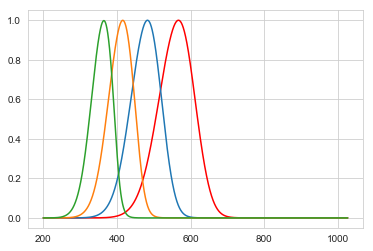

In [14]:
plt.plot(WvsX,red,c='r')
plt.plot(WvsX,green)
plt.plot(WvsX,blue)
plt.plot(WvsX,uv)



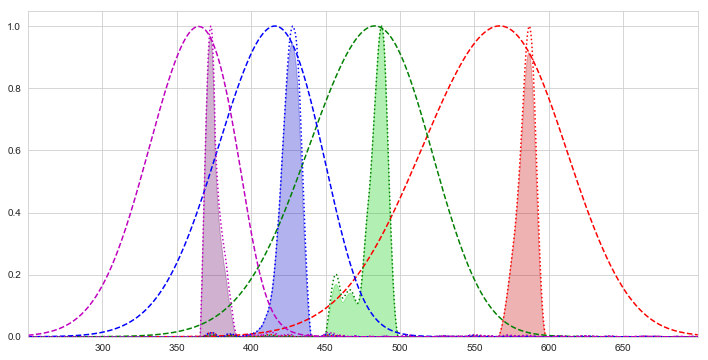

In [15]:
RedLEDNormalised = Smoothed[0,80,:]/np.amax(Smoothed[0,80,:])
GreenLEDNormalised = Smoothed[1,80,:]/np.amax(Smoothed[1,80,:])
BlueLEDNormalised = Smoothed[2,80,:]/np.amax(Smoothed[2,80,:])
UVLEDNormalised = Smoothed[3,80,:]/np.amax(Smoothed[3,80,:])

fig,ax = plt.subplots(1,1,figsize = (12,6))

ax.plot(WvsX,red,'r--')
ax.plot(WvsX,RedLEDNormalised,'r:')
ax.fill(WvsX,np.multiply(red,RedLEDNormalised), c = (0.8,0.0,0.0,0.3))

ax.plot(WvsX,green,'g--')
ax.plot(WvsX,GreenLEDNormalised,'g:')
ax.fill(WvsX,np.multiply(green,GreenLEDNormalised), c = (0.0,0.8,0.0,0.3))

ax.plot(WvsX,blue,'b--')
ax.plot(WvsX,BlueLEDNormalised,'b:')
ax.fill(WvsX,np.multiply(blue,BlueLEDNormalised), c = (0.0,0.0,0.8,0.3))

ax.plot(WvsX,uv,'m--')
ax.plot(WvsX,UVLEDNormalised,'m:')
ax.fill(WvsX,np.multiply(uv,UVLEDNormalised), c = (0.4,0.0,0.4,0.3))

ax.set_xticks([300,350,400,450,500,550,600,650])
ax.set_xlim(250,700)
ax.set_ylim(0,1.05)

plt.savefig("Graph03.png")

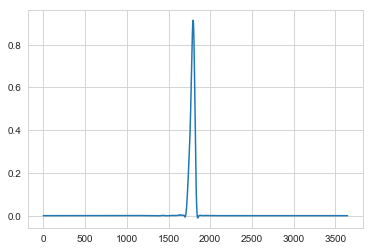

In [16]:
plt.plot(np.multiply(red,RedLEDNormalised))

In [17]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://badenlabdotorg.files.wordpress.com/2018/03/cropped-lab-logo_banner21.png", width=1000, height=1000)

In [45]:
a = np.asarray([0,  49,0,0,49,0,0,0,49,0,0,49,49,49,49,49,49,49,0,0,0,49,49,49,0,49,49,49,0,0,49,0,0,0,0,49,49,49,49,0,49,49,49,49,0,49,49,49,49,0,49
  ,0,0,0,0,0,49,49,0,0,49,0,0,49,0,0,49,49,0,0,49,0,0,0,0,49,0,49,0,0,49,0,49,0,49,49,49,0,49,49,49,49,49,49,49,0,0,49,49,0,0
  ,49,49,49,49,49,0,49,49,49,49,49,0,49,49,0,49,0,49,49,0,49,49,49,0,0,49,0,49,0,0,49,0,49,0,49,0,0,49,49,0,0,49,49,49,0,0,0,49,0,49
  ,49,0,49,49,49,49,0,0,0,49,0,49,0,49,49,0,0,49,0,0,0,0,49,0,49,0,0,49,0,49,0,49,49,0,0,49,49,0,0,0,0,0,49,49,0,0,0,49,0,0
  ,0,0,49,49,49,0,0,49,0,0,0,0,0,49,49,0,0,0,0,0,0,0,49,0,0,0,49,49,49,49,0,49,0,0,49,49,49,0,49,49,0,0,0,49,49,0,0,49,49,49
  ,0,49,0,49,49,49,49,49,0,0,49,49,49,49,49,0,49,0,49,49,0,0,0,49,0,0,49,0,0,49,49,0,0,49,0,49,0,0,49,0,0,49,0,0,49,49,49,49,49,0
  ,0,0,0,0,0,0,49,49,0,49,0,0,49,0,0,0,49,49,49,0,49,0,0,0,49,49,0,49,49,0,49,0,0,0,0,0,49,49,49,0,0,0,0,0,0,0,49,0,49,49
  ,49,0,0,49,0,0,0,49,0,49,0,0,0,0,0,0,0,49,49,49,0,0,0,0,49,49,0,0,0,49,49,49,0,49,49,0,49,0,49,49,49,49,0,49,0,49,49,0,0,49
  ,0,0,49,0,0,0,49,0,49,0,49,0,0,0,0,0,0,0,0,49,0,49,49,0,0,49,49,0,0,0,49,49,49,0,0,49,0,49,49,0,49,49,0,49,49,49,0,0,0,49
  ,0,49,0,0,0,49,49,49,49,0,0,49,0,0,49,49,0,49,0,49,0,0,49,0,49,0,0,0,0,49,0,49,0,0,49,49,49,49,0,49,0,0,49,49,49,0,0,0,49,49
  ,0,49,0,49,0,49,49,49,49,0,0,49,0,49,49,0,49,0,0,49,49,49,0,49,49,0,49,49,49,49,0,49,49,49,49,0,49,49,0,0,0,49,0,0,0,49,49,0,49,0
  ,49,0,49,0,0,0,0,49,0,49,49,49,49,49,0,49,0,49,49,0,0,0,0,0,49,49,49,0,49,49,49,0,0,49,0,0,49,0,49,0,49,0,49,0,49,0,49,49,0,0
  ,49,49,49,49,49,49,0,0,49,49,49,49,49,49,49,49,0,0,0,49,0,49,0,0,0,0,49,49,0,0,49,49,0,0,0,0,49,0,49,49,0,49,49,49,49,0,49,49,49,49
  ,0,0,0,49,49,0,0,0,0,0,0,0,0,49,0,49,0,49,49,49,0,49,0,49,0,0,49,49,49,0,49,0,0,0,49,0,0,49,0,49,0,49,49,0,0,49,0,0,49,49
  ,49,0,49,0,49,0,0,0,49,49,49,49,0,49,49,49,49,0,0,0,0,49,49,0,49,49,49,0,49,49,49,49,0,0,49,49,49,49,49,0,49,49,0,49,0,49,49,49,49,49
  ,0,49,49,49,0,0,0,0,0,0,0,0,49,0,0,49,0,0,0,49,49,49,49,0,0,0,49,0,49,0,49,0,49,0,49,49,49,49,0,0,49,0,49,0,49,0,0,49,0,0
  ,49,49,49,49,0,49,49,49,0,0,49,49,49,0,49,49,0,0,0,0,0,49,49,0,49,49,0,49,49,49,0,0,49,49,49,49,49,0,49,0,0,0,49,0,0,49,49,0,49,0
  ,49,49,0,49,0,0,0,0,49,49,0,49,49,49,0,49,0,49,0,0,49,0,0,0,49,0,49,0,49,49,49,49,0,49,0,0,0,0,0,0,0,0,0,0,49,49,0,49,0,49
  ,49,49,0,0,49,49,49,0,49,0,49,0,0,49,49,49,49,49,49,49,49,0,49,0,0,0,49,0,49,0,49,0,49,0,49,0,0,0,49,49,49,0,0,0,49,0,0,0,0,49
  ,0,49,49,49,0,49,49,49,0,49,49,49,49,0,0,49,49,0,49,0,49,49,0,0,49,49,49,49,49,0,49,49,0,49,49,49,0,49,0,0,0,49,49,49,49,0,0,0,0,0
  ,0,0,49,0,0,49,0,49,49,49,0,0,49,49,0,49,49,0,49,49,49,0,0,0,49,0,49,49,0,0,0,0,49,49,49,0,49,0,0,49,49,0,0,49,0,49,49,49,49,0
  ,49,0,49,49,0,49,49,49,0,0,0,49,49,0,49,0,0,0,0,0,49,49,49,49,49,0,0,0,0,0,49,49,49,49,0,49,0,0,49,49,0,0,49,0,0,0,0,0,0,0
  ,49,49,0,49,49,49,0,49,49,0,49,0,49,49,0,0,49,49,49,0,49,0,49,0,49,0,0,49,49,0,0,49,49,49,0,49,0,49,49,49,0,49,0,49,49,49,0,49,0,0
  ,0,49,49,0,49,49,0,49,49,0,0,0,0,0,0,0,49,0,49,0,49,49,49,49,0,49,0,0,49,49,49,49,0,49,49,0,49,0,49,49,49,0,0,49,49,49,49,49,49,49
  ,49,49,0,0,0,0,49,0,49,49,49,49,0,49,49,49,0,49,49,0,0,0,49,0,0,49,49,49,49,0,0,0,49,0,49,0,0,0,49,49,0,49,0,49,49,0,0,49,49,0
  ,49,49,0,0,0,0,0,49,49,0,0,49,0,0,49,0,0,0,0,49,49,0,49,49,0,0,0,0,49,0,0,49,49,49,0,0,0,0,0,0,49,49,0,49,49,49,49,49,0,49
  ,0,49,49,0,49,49,0,49,49,0,0,0,49,0,0,49,49,0,49,0,0,49,49,0,0,0,49,49,49,49,0,49,0,49,49,0,49,49,49,49,49,49,49,49,49,0,0,0,49,0
  ,49,49,0,49,49,0,0,49,0,0,49,0,49,49,49,0,0,0,0,49,0,0,49,49,0,0,49,0,0,0,49,0,49,49,49,49,49,49,0,0,49,0,49,49,49,0,0,49,49,49
  ,49,0,0,49,49,0,49,49,49,49,0,49,49,49,0,49,49,49,0,0,0,49,49,0,0,0,49,0,0,49,49,0,49,49,0,0,0,0,0,0,0,49,49,49,0,49,0,0,49,0
  ,0,0,0,49,49,0,49,0,49,0,0,49,0,0,0,0,0,49,49,49,49,0,0,0,49,0,0,49,49,49,0,0,49,0,49,0,0,0,49,0,0,0,0,49,0,0,49,0,49,49
  ,0,0,0,0,0,0,49,49,0,49,49,0,0,0,0,0,0,49,0,49,49,0,0,49,49,0,0,0,0,0,0,49,49,0,49,49,49,0,0,49,49,0,0,49,49,49,0,49,49,0
  ,49,49,0,49,49,0,0,0,49,0,49,49,49,49,0,0,49,49,49,49,0,49,0,49,0,49,49,0,49,49,49,0,49,49,0,49,49,49,0,0,49,49,49,49,0,0,0,49,0,49
  ,49,0,49,0,0,0,0,0,49,49,49,49,0,0,0,0,0,0,49,49,0,49,0,49,0,0,0,0,0,49,49,0,49,0,0,49,0,0,0,0,0,49,0,0,49,49,49,0,49,0
  ,49,0,49,49,49,0,0,0,49,49,49,0,49,49,49,49,0,0,49,49,49,49,49,0,0,0,0,49,49,0,49,0,49,0,0,49,0,49,0,49,49,0,49,0,49,0,49,0,0,49
  ,0,49,49,0,49,0,0,0,49,49,0,49,0,49,0,0,0,49,0,49,0,0,49,49,49,49,49,0,49,49,49,49,0,49,49,0,0,49,49,0,49,0,0,49,0,49,0,0,0,0
  ,49,49,49,49,49,49,49,49,0,0,49,49,0,0,49,49,0,0,49,49,0,0,0,0,0,49,0,0,49,49,0,0,49,0,49,0,49,49,49,49,49,49,49,49,0,49,0,0,49,0
  ,49,49,0,0,49,0,49,49,0,49,0,0,49,0,0,49,0,0,49,49,0,49,0,49,49,0,49,49,49,49,49,49,0,49,49,0,49,0,0,0,0,49,0,0,0,49,49,49,49,49
  ,49,0,0,0,0,49,49,49,0,0,49,0,0,0,0,0,49,49,0,0,0,0,49,0,0,49,49,49,0,49,0,49,0,0,49,49,0,49,49,49,49,0,0,0,49,0,0,49,0,0
  ,49,49,49,0,0,0,49,0,49,0,49,49,49,49,49,0,49,0,49,49,0,0,0,0,49,0,0,0,49,0,0,0,49,49,49,49,0,49,49,0,49,49,0,0,0,0,49,0,49,0
  ,0,0,0,0,49,49,0,49,49,0,0,0,0,0,49,0,0,0,0,49,0,0,49,49,49,49,0,49,0,0,0,49,49,0,0,49,0,0,49,0,49,0,0,0,0,49,0,49,49,0
  ,49,0,49,0,49,49,49,49,49,0,0,49,0,0,49,0,49,49,0,0,49,0,49,49,0,0,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,0,0,0,49,0,49,49,49,49
  ,0,0,0,49,49,0,0,0,49,49,49,0,49,0,0,49,0,49,0,49,49,0,0,49,49,49,49,49,49,0,49,49,49,49,0,0,49,49,0,0,0,0,49,0,0,0,0,0,0,49
  ,0,0,49,49,0,0,0,49,49,49,49,49,49,49,49,49,49,49,0,0,49,0,0,0,49,0,0,0,0,49,49,49,0,0,0,0,49,49,49,49,0,49,49,49,49,49,0,0,49,0
  ,49,49,0,49,0,49,49,0,0,0,49,49,0,0,0,49,0,49,49,0,0,0,49,49,0,49,0,49,49,49,49,49,49,0,0,0,0,0,49,49,0,49,49,0,0,49,0,49,49,0
  ,49,0,0,49,49,0,49,0,0,49,49,0,49,49,0,0,49,0,0,49,0,49,0,49,0,49,0,0,49,49,49,0,49,49,0,49,0,0,0,49,0,0,0,0,0,0,49,0,49,0
  ,0,49,49,0,0,49,0,49,0,49,49,0,0,0,49,49,49,49,49,0,49,0,49,49,0,49,0,0,0,0,49,49,0,49,49,0,0,0,49,0,49,0,49,0,49,49,0,0,0,49
  ,0,49,0,49,49,0,49,49,0,0,49,49,49,0,0,49,0,49,49,0,0,49,49,49,0,49,0,0,49,49,0,49,49,0,49,0,0,0,0,0,0,0,49,49,49,0,0,0,49,49
  ,49,0,0,0,49,0,49,49,49,49,49,0,0,0,49,0,49,49,49,0,49,0,49,49,49,0,0,49,49,0,0,49,49,0,0,49,49,0,0,49,49,0,0,0,0,0,49,49,0,0
  ,0,49,0,49,0,0,49,0,0,49,49,0,49,0,0,49,0,0,0,49,0,0,49,0,0,49,49,49,49,0,49,49,0,0,0,49,0,0,49,49,49,49,0,0,0,0,49,49,0,49
  ,0,49,0,0,0,49,0,49,0,49,49,0,0,0,0,0,0,0,49,0,49,49,49,49,0,0,49,49,0,49,0,0,49,49,0,49,0,49,49,49,49,49,0,49,0,49,0,49,49,0
  ,0,0,0,0,49,49,0,0,49,0,49,49,49,0,0,0,49,0,0,0,0,49,49,0,49,49,0,0,49,0,0,0,0,49,49,49,49,0,0,49,49,0,0,0,0,49,49,49,0,0
  ,49,49,0,0,49,0,0,49,49,49,0,0,0,49,49,0,49,49,49,49,49,49,49,49,49,49,49,0,49,49,49,0,0,0,0,49,0,49,49,0,0,0,49,49,49,49,0,0,49,0
  ,0,49,0,49,49,49,0,0,0,0,0,49,49,49,49,0,0,49,49,49,0,49,0,0,0,0,0,49,0,0,0,49,0,49,0,49,49,49,0,49,0,0,0,0,49,0,0,0,49,49
  ,49,0,0,0,49,0,0,49,49,49,49,49,0,49,0,0,0,49,49,49,49,0,49,49,0,49,0,49,49,0,0,49,0,0,0,49,0,49,49,0,0,49,0,49,0,0,0,49,49,49
  ,49,49,0,0,0,49,49,0,49,0,49,0,49,0,49,49,49,49,49,0,0,49,49,49,49,49,0,49,49,49,49,49,0,0,49,0,49,0,0,49,0,49,0,0,49,49,0,0,49,0
  ,49,0,49,0,0,49,0,0,0,49,49,49,49,0,49,49,0,49,49,0,0,49,49,49,0,0,49,49,49,49,0,0,49,0,49,49,49,0,49,49,0,0,49,49,0,0,49,0,49,49
  ,49,0,0,0,49,0,0,49,0,49,0,0,0,0,0,49,0,0,49,0,49,49,0,0,49,49,49,49,49,49,0,0,49,49,0,0,49,49,49,49,0,0,0,0,49,0,49,0,49,0
  ,49,0,0,49,49,0,0,49,49,0,0,0,49,0,0,49,0,0,49,0,0,49,49,0,49,0,49,49,0,49,49,49,49,49,49,0,0,49,49,49,0,0,0,0,49,0,0,0,49,0
  ,0,0,49,0,0,0,0,49,0,49,0,0,0,49,49,0,49,0,49,49,0,0,49,49,0,0,49,49,0,0,49,49,49,49,49,49,49,49,0,0,0,0,0,49,0,49,49,49,49,49
  ,0,0,49,49,0,0,49,49,49,0,0,49,49,0,49,0,49,49,0,49,0,49,0,0,0,0,49,49,49,49,0,49,0,0,0,49,49,0,49,49,0,0,49,0,0,49,49,49,49,49
])

b = np.asarray([0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,21,0,21,21,0,0,0,0,21,0,21,0,0,21,0,0,21,0,0,21,0,21,0,0,0,0,0,21,0,21,21,0,21,21,0,0
  ,0,0,21,21,0,21,0,0,0,0,0,0,21,21,21,0,0,21,21,21,21,21,0,21,0,21,0,0,21,21,21,0,0,21,21,0,21,21,21,21,21,21,21,21,21,0,0,21,21,0
  ,21,21,21,0,0,21,21,0,0,21,0,21,21,0,0,21,21,21,0,21,21,21,21,0,0,21,21,21,21,21,0,0,21,21,21,21,21,21,21,0,21,21,0,0,0,0,0,0,0,21
  ,21,21,21,21,21,0,0,0,21,0,0,0,21,0,21,0,0,0,0,21,21,0,0,21,0,21,0,0,21,0,21,0,21,0,0,0,0,0,0,0,21,0,21,0,0,21,21,21,21,21
  ,21,21,21,0,0,0,21,21,21,0,0,21,21,21,21,21,0,21,21,21,21,0,21,0,21,0,21,0,21,0,21,0,21,21,0,21,0,0,21,0,0,0,21,0,0,21,0,21,21,0
  ,0,0,0,21,0,0,0,0,0,0,0,0,0,0,21,0,21,0,21,0,0,0,21,21,0,21,0,0,21,0,0,0,21,0,0,21,21,21,0,0,21,0,0,0,0,0,0,0,21,0
  ,21,21,0,0,0,21,21,21,0,21,0,21,21,0,21,21,0,21,0,21,21,0,0,21,0,21,0,0,0,21,21,21,0,21,0,0,21,21,0,0,0,21,0,0,0,21,21,0,0,21
  ,0,21,0,21,21,0,0,21,21,0,0,21,21,21,21,21,21,21,0,21,0,0,0,21,0,0,21,0,21,0,21,21,0,0,21,21,0,21,21,21,21,21,21,21,21,0,21,0,0,0
  ,21,0,21,21,0,0,0,0,0,0,0,21,0,0,0,21,0,0,0,21,21,0,0,21,21,21,0,0,21,0,21,21,21,21,0,21,0,0,21,0,21,21,0,0,21,0,0,0,0,21
  ,0,21,21,0,0,0,21,21,21,21,0,0,0,21,21,0,0,0,0,21,21,0,21,0,21,21,0,21,0,0,21,0,21,0,21,0,21,0,0,21,0,0,21,21,0,21,0,0,0,0
  ,0,0,0,0,0,0,0,0,0,0,0,21,0,21,0,0,21,21,21,21,21,0,21,0,0,21,0,21,0,21,21,21,0,21,0,21,0,0,0,0,21,21,0,21,0,21,0,0,0,21
  ,21,21,21,21,21,21,0,0,0,0,0,0,0,21,0,0,21,21,21,0,21,21,21,0,21,0,0,0,21,21,21,21,21,0,0,21,21,0,21,21,21,21,21,0,0,21,21,21,0,21
  ,21,21,21,21,21,0,0,21,21,0,0,0,0,0,21,0,0,0,0,0,0,21,0,0,0,21,0,21,0,0,21,21,21,21,21,0,21,21,21,0,21,21,21,21,0,0,21,21,0,0
  ,0,0,0,21,21,21,21,21,0,0,21,0,21,0,21,0,0,21,0,0,21,21,0,21,21,21,21,0,0,21,0,0,21,0,0,21,0,21,0,21,0,0,0,0,0,0,21,21,0,21
  ,0,0,0,0,0,0,21,0,21,0,0,0,0,0,0,21,21,21,0,0,0,0,21,21,0,21,0,0,21,0,21,0,0,0,21,21,21,21,21,0,0,21,21,0,21,21,21,0,21,0
  ,0,0,0,21,21,21,0,0,21,0,0,0,0,0,0,21,0,21,21,0,0,21,21,0,21,0,0,21,21,0,21,21,0,0,0,21,21,0,21,0,21,0,21,0,0,0,0,0,0,21
  ,21,21,0,0,21,0,0,21,21,0,21,0,0,0,21,0,0,0,21,21,21,21,21,0,0,0,21,21,0,21,21,0,0,0,21,0,21,0,0,21,21,21,0,21,0,0,0,0,21,0
  ,0,0,21,0,0,0,0,0,21,21,21,21,0,21,0,21,0,0,0,0,0,21,0,0,0,0,0,21,0,21,21,0,0,21,0,21,0,21,21,21,21,21,21,21,0,0,21,0,21,0
  ,0,21,0,0,0,0,21,21,0,0,21,0,0,0,21,0,0,0,21,0,21,0,0,21,0,0,21,0,0,0,21,0,0,0,0,21,0,21,0,0,0,0,0,0,0,0,0,21,21,0
  ,0,21,21,0,0,21,21,21,21,0,21,0,0,0,0,21,21,21,0,21,0,0,0,21,0,21,21,21,0,0,0,0,21,21,21,21,0,0,0,0,21,21,0,0,21,21,21,21,21,21
  ,21,0,21,0,0,21,0,0,0,0,0,21,21,21,21,21,0,0,0,21,21,21,21,21,21,0,21,0,0,21,0,0,0,0,21,0,0,21,21,21,0,0,21,21,0,0,0,21,21,0
  ,0,0,21,0,0,0,21,21,0,0,0,0,21,21,0,21,0,0,0,21,0,0,21,21,0,0,0,21,21,0,0,0,21,0,0,0,21,0,0,0,21,21,0,21,21,0,21,0,0,21
  ,21,21,21,0,0,21,21,21,0,21,21,0,21,0,21,21,0,21,0,21,21,21,0,0,0,21,0,0,21,21,0,0,0,0,21,0,21,0,21,21,0,0,21,0,0,0,0,21,21,0
  ,21,0,0,0,21,0,0,0,0,21,0,0,21,21,0,21,0,21,0,0,21,21,21,21,0,0,0,21,21,0,21,21,21,21,0,0,21,0,0,0,21,21,21,0,21,21,0,0,21,21
  ,21,21,0,21,21,0,0,21,21,0,21,21,0,21,0,0,0,0,0,21,21,0,0,0,21,0,21,0,21,21,0,21,21,21,21,0,21,0,0,21,21,0,21,0,21,21,0,21,0,0
  ,21,21,21,0,0,0,0,21,0,0,0,21,0,21,21,0,21,21,21,21,0,21,0,0,21,21,0,21,21,0,0,0,0,21,21,21,21,0,21,21,0,0,21,0,21,0,21,0,21,21
  ,0,0,21,21,0,0,21,21,0,21,0,21,21,0,0,0,0,0,21,0,21,21,21,21,21,0,0,21,21,21,0,21,21,0,21,21,21,21,21,0,21,21,21,0,0,0,21,21,0,21
  ,0,21,0,0,0,21,21,21,21,21,0,21,0,21,0,21,0,0,0,21,21,0,0,0,0,0,0,0,0,21,0,21,21,0,21,21,0,0,0,21,0,21,21,21,0,0,21,0,0,21
  ,21,21,21,0,21,21,0,21,21,0,0,21,21,0,0,0,21,0,0,21,21,21,21,0,0,0,0,0,21,21,0,21,0,21,21,21,0,21,0,21,21,0,21,21,0,0,21,0,21,21
  ,0,0,21,0,0,21,0,0,0,21,0,21,21,0,0,0,0,21,0,0,21,0,21,21,0,21,21,0,0,0,0,0,0,0,21,0,0,0,21,0,0,0,21,21,0,0,21,21,21,0
  ,21,21,0,21,0,0,0,0,0,0,21,0,0,0,0,21,0,0,0,21,21,21,0,21,0,0,0,21,0,21,0,0,21,0,0,21,21,0,0,21,21,0,0,0,0,21,0,21,0,0
  ,21,0,21,21,0,21,0,21,21,0,21,0,0,21,21,21,21,0,0,0,21,21,21,21,21,21,0,21,0,0,0,0,21,21,0,0,21,0,0,0,21,21,0,21,21,21,0,0,0,0
  ,0,21,0,21,0,21,21,21,21,21,0,0,21,0,21,0,0,0,0,21,21,21,21,21,21,0,0,0,0,0,0,0,0,21,21,0,0,21,21,21,0,0,21,0,21,0,21,21,21,0
  ,0,0,21,0,21,0,21,21,21,0,0,0,21,21,0,0,0,0,0,21,21,21,21,0,0,21,21,21,0,0,21,0,21,21,21,0,0,21,0,0,0,21,21,21,21,21,0,21,0,21
  ,0,21,21,21,0,0,21,0,0,21,0,0,0,21,21,21,21,21,0,21,0,0,0,0,0,0,0,21,21,0,0,21,0,21,21,0,0,21,21,21,21,0,21,0,0,21,21,0,0,0
  ,21,0,21,0,0,0,0,21,0,0,0,0,0,21,21,0,21,0,0,21,0,21,21,0,21,21,0,0,0,0,21,0,0,0,21,21,0,0,21,0,0,0,21,0,0,21,0,0,21,21
  ,0,21,0,0,21,21,0,21,0,21,21,21,21,21,0,21,21,21,0,21,21,21,21,21,21,0,21,21,21,0,0,21,0,0,0,0,21,21,0,21,0,0,0,21,21,21,0,0,21,21
  ,21,0,0,21,0,0,21,21,0,0,0,0,21,0,21,0,0,0,0,21,21,0,0,21,21,0,0,0,0,0,0,0,21,0,0,0,0,0,0,21,0,21,21,0,21,21,21,0,0,21
  ,0,0,0,21,21,0,0,0,21,21,21,0,0,21,0,0,21,21,21,21,21,0,21,0,0,21,0,21,21,21,21,0,21,21,21,21,0,0,21,0,21,0,0,21,0,21,0,21,0,0
  ,0,21,21,21,21,0,21,0,21,21,0,0,21,0,21,21,21,21,0,0,0,0,0,0,21,0,0,0,21,0,0,0,21,0,0,21,0,21,0,0,21,0,21,21,21,0,21,21,0,21
  ,21,21,0,0,21,21,21,21,21,0,0,0,0,21,0,21,0,0,21,21,21,21,21,21,0,0,0,0,0,21,0,0,0,0,21,21,21,21,0,21,0,0,21,21,21,21,21,0,0,21
  ,0,21,21,0,21,0,21,21,0,0,0,21,0,21,0,21,21,0,21,0,0,21,21,21,21,0,21,0,21,21,21,21,0,0,21,0,21,0,0,21,21,21,0,0,0,0,0,21,0,0
  ,21,21,0,0,21,21,21,21,0,21,0,21,21,21,0,0,0,21,21,0,0,21,21,0,0,21,0,21,0,0,0,21,0,0,21,21,21,21,21,0,21,0,0,0,21,0,0,21,0,21
  ,21,21,0,0,0,0,0,0,21,21,0,0,21,21,21,0,0,21,21,0,0,21,21,21,21,0,0,21,21,21,21,21,21,21,21,0,21,21,0,21,0,21,21,0,21,0,0,0,21,0
  ,0,21,0,21,21,21,21,21,21,21,0,21,21,0,21,0,0,21,21,0,21,21,21,21,0,21,21,21,21,0,21,21,0,21,21,0,0,21,21,0,21,0,0,21,0,21,0,0,0,21
  ,0,0,0,21,0,21,21,21,21,21,21,0,0,0,21,0,0,21,21,21,0,21,21,21,0,0,21,21,21,21,21,21,0,0,21,0,0,21,0,21,21,0,21,0,0,21,0,0,0,21
  ,21,0,0,0,0,0,21,0,0,21,21,0,0,21,0,0,21,0,0,0,0,21,21,21,21,21,21,0,0,0,21,21,0,21,21,0,21,21,21,21,0,21,21,0,0,21,0,21,0,21
  ,0,0,0,0,0,0,21,21,21,0,0,21,0,0,0,0,21,21,21,0,21,21,0,0,21,21,21,0,21,0,21,21,0,0,0,0,21,21,21,0,0,0,0,0,21,0,21,0,21,21
  ,21,0,0,0,21,0,0,21,21,0,21,21,0,0,21,0,0,0,0,21,0,21,21,21,0,0,0,21,21,21,0,0,0,0,0,0,0,21,21,0,21,0,0,0,0,21,21,0,0,21
  ,0,0,0,0,0,21,0,21,0,21,0,0,21,0,21,0,0,21,0,21,0,21,21,21,21,21,0,21,21,0,21,0,0,0,21,0,21,0,21,21,0,21,0,0,21,0,21,0,0,21
  ,0,21,0,21,21,21,0,21,21,21,0,0,0,21,0,0,21,21,0,21,0,0,21,0,21,0,0,21,21,21,0,0,0,21,0,0,21,21,21,0,0,21,21,0,0,0,21,0,21,21
  ,0,21,21,21,0,21,21,21,0,21,0,0,21,21,0,0,21,0,0,21,0,0,0,21,0,21,21,0,21,21,0,0,21,0,21,0,21,0,0,21,21,0,0,0,21,21,0,21,0,0
  ,21,21,0,0,21,0,0,21,21,21,21,21,0,0,21,21,21,21,0,0,21,21,21,21,21,21,0,0,21,0,21,21,21,21,21,21,21,0,0,0,21,21,21,0,21,0,0,0,0,21
  ,21,0,0,21,0,0,21,0,0,0,0,21,0,0,21,0,21,0,21,21,21,21,21,21,21,0,21,0,0,21,0,0,21,21,21,0,0,0,0,0,21,21,0,0,0,0,0,21,21,0
  ,21,0,21,0,0,0,0,21,0,21,21,21,0,21,21,0,21,21,21,21,0,0,0,0,21,0,0,0,21,21,0,21,21,0,21,0,0,21,0,0,0,0,0,0,0,0,21,0,0,21
  ,0,0,0,0,0,21,0,21,21,21,21,0,0,21,21,21,0,21,0,21,0,0,21,21,0,0,21,21,0,0,21,21,0,0,0,21,21,0,0,0,0,0,0,21,21,0,0,21,21,0
  ,0,21,21,0,0,0,21,0,21,21,21,0,0,21,0,0,21,0,0,0,0,21,21,0,21,0,0,21,21,0,0,21,21,0,21,0,21,0,21,0,0,21,0,21,21,0,21,21,0,0
  ,21,0,0,0,0,21,21,21,0,21,0,21,21,0,21,0,21,0,21,21,0,21,21,0,0,21,21,0,21,21,21,0,0,0,0,21,21,0,0,21,21,0,0,0,0,21,0,0,0,21
  ,0,21,21,0,0,21,0,21,21,0,21,21,21,21,0,21,21,21,21,21,0,0,0,0,21,21,0,0,0,21,21,21,21,0,0,0,0,21,21,0,0,21,21,21,0,0,0,0,21,0
  ,0,21,21,0,21,0,21,0,21,21,0,21,21,21,0,0,0,21,21,21,0,0,21,21,21,21,0,21,21,21,21,21,21,21,21,0,0,0,0,0,21,21,21,0,0,21,21,21,0,0
    ])

c = np.asarray([0,  0,0,0,0,0,40,40,40,0,40,40,40,40,0,40,40,40,40,40,40,40,0,40,40,0,0,0,0,0,40,40,0,40,0,0,40,0,40,0,0,40,0,0,0,0,0,0,40,40,40
  ,0,40,0,40,40,40,0,0,40,40,0,40,40,0,40,40,40,0,40,40,40,0,40,0,40,0,40,0,40,40,40,40,0,0,0,0,0,0,0,40,40,0,0,40,0,0,0,40,40,40
  ,0,0,0,0,0,40,0,40,40,40,0,0,0,0,40,40,40,0,40,40,0,0,40,40,0,0,40,0,40,0,0,40,40,40,40,0,0,0,40,0,0,40,0,0,0,40,40,40,0,0
  ,40,40,0,40,0,40,40,40,40,40,40,0,40,40,0,0,0,40,0,40,40,40,0,40,40,40,40,40,40,0,0,0,40,0,0,40,0,40,0,40,0,40,0,0,0,0,0,40,0,40
  ,40,0,0,40,40,0,40,0,40,0,0,40,0,40,40,0,40,40,40,0,0,40,40,40,0,0,0,0,0,0,0,0,40,0,40,40,0,40,0,40,0,0,40,40,0,0,40,0,0,0
  ,40,40,0,0,40,40,0,0,0,0,0,40,0,40,0,0,40,0,40,40,40,0,40,40,40,0,0,0,0,0,40,0,0,40,0,40,40,40,0,40,40,0,0,0,0,40,0,40,0,0
  ,40,40,0,40,0,40,40,40,40,0,0,0,40,40,0,0,0,40,40,0,0,40,40,40,0,40,0,0,0,40,0,0,40,0,0,0,0,40,40,0,0,40,0,40,0,0,0,40,0,0
  ,0,40,0,40,0,40,40,40,0,40,0,0,0,0,0,0,40,40,40,0,40,0,0,40,0,0,0,0,0,40,0,0,0,40,40,40,40,40,40,0,40,40,0,40,0,40,40,40,40,40
  ,0,0,0,0,40,40,0,0,0,40,40,0,40,0,0,40,40,0,40,40,40,40,0,0,0,0,40,40,0,40,0,0,0,0,0,0,0,40,40,0,0,0,0,40,0,40,0,0,0,0
  ,40,0,40,40,0,0,40,40,40,0,0,40,0,40,40,0,0,40,40,0,40,40,0,40,40,0,40,40,0,40,0,40,40,40,40,0,0,40,0,0,0,0,40,0,40,0,0,40,0,40
  ,40,0,40,0,0,40,0,40,40,40,40,0,40,40,0,0,40,0,0,40,40,0,40,40,0,0,0,40,40,40,40,0,0,40,40,40,0,40,0,0,40,40,40,0,40,40,0,0,0,0
  ,0,0,40,0,40,40,40,40,40,0,0,40,0,40,40,40,0,40,40,40,40,0,0,40,0,40,0,40,40,0,40,40,0,0,0,40,40,40,40,40,0,0,0,0,40,0,40,0,40,40
  ,40,0,40,0,40,0,40,0,40,40,40,40,40,40,0,40,0,40,0,0,40,40,40,40,40,40,40,40,0,0,40,0,40,0,0,40,40,40,0,0,0,0,40,0,0,0,40,40,0,0
  ,0,0,40,40,40,0,40,40,0,0,0,0,40,40,0,40,40,0,0,40,0,40,40,40,40,40,40,0,0,40,40,40,40,40,40,0,0,0,0,0,40,0,0,40,40,0,40,0,0,40
  ,40,0,0,0,0,0,0,40,40,0,0,0,40,0,40,40,40,0,40,40,0,40,0,40,40,0,40,40,0,40,0,0,40,0,0,40,0,40,40,40,40,40,40,40,40,0,0,40,40,40
  ,40,0,40,40,0,40,0,40,0,0,40,0,0,0,40,40,0,0,40,40,40,40,40,40,0,40,40,40,0,40,40,0,0,40,0,0,0,40,40,40,0,0,40,40,40,0,0,40,0,0
  ,0,40,0,0,40,40,0,40,0,40,0,0,40,0,40,40,0,40,0,40,40,40,40,0,0,0,0,0,0,40,0,40,40,0,0,40,0,0,40,0,0,40,40,40,0,40,0,0,40,0
  ,0,0,40,0,40,0,0,0,40,40,40,0,40,0,0,0,40,0,40,40,0,0,40,40,0,40,40,0,40,40,40,0,40,0,0,0,0,40,0,0,40,40,0,0,0,0,40,40,0,40
  ,0,40,0,40,40,0,0,0,0,40,0,40,0,40,40,0,0,40,40,0,0,0,0,0,40,0,0,0,40,40,40,40,40,40,0,0,0,0,0,40,40,40,40,40,0,40,40,0,40,0
  ,40,0,0,40,40,40,0,40,40,40,40,40,0,40,0,0,0,0,40,0,0,0,0,0,0,0,40,40,40,0,0,40,0,0,40,40,40,40,0,40,0,40,0,40,40,40,0,0,40,40
  ,40,40,40,0,40,0,40,40,0,40,40,40,40,40,40,0,40,0,0,0,0,0,0,40,40,40,40,0,0,0,0,0,40,0,40,0,0,40,40,40,0,0,40,40,0,0,40,40,0,40
  ,0,40,40,40,40,0,40,0,0,40,40,0,40,40,40,0,0,40,0,0,40,40,0,0,0,0,0,0,0,0,40,0,40,0,40,0,0,40,0,40,0,40,40,0,40,0,0,40,0,0
  ,40,0,40,40,0,40,0,40,0,0,40,0,40,40,0,0,40,40,0,0,0,0,40,40,40,0,0,40,40,40,0,40,0,40,40,0,0,0,0,0,40,40,40,0,40,0,0,0,40,40
  ,40,40,40,0,0,0,0,40,40,40,0,0,0,0,40,40,40,40,0,40,40,40,0,40,40,40,40,0,0,0,0,0,40,0,40,0,0,0,40,40,0,40,0,40,40,40,0,40,40,40
  ,40,0,40,0,0,40,0,40,40,40,0,0,40,0,0,0,40,40,40,0,40,40,40,40,0,40,0,0,0,0,0,40,40,0,0,40,0,40,0,40,40,40,40,0,40,0,40,40,40,40
  ,40,0,0,0,40,40,0,0,40,40,0,40,0,40,0,0,40,40,40,40,40,40,0,40,0,40,0,0,40,40,0,40,40,40,0,40,0,40,0,40,0,0,0,0,0,40,40,40,0,0
  ,40,40,0,40,40,40,40,40,0,40,0,0,0,40,40,40,40,0,0,0,0,40,40,0,0,40,40,0,0,0,0,0,0,0,40,40,0,0,0,40,0,0,0,0,40,40,0,0,40,0
  ,40,0,40,40,0,40,40,40,0,0,40,0,0,0,40,0,40,0,40,40,0,0,40,0,0,40,0,0,40,40,40,40,0,0,40,0,40,0,0,40,0,0,40,40,40,0,0,0,0,0
  ,0,0,40,0,0,40,0,0,0,40,0,40,40,40,40,40,40,40,40,0,40,40,40,40,0,0,0,0,0,0,40,0,40,40,40,40,0,0,0,0,40,0,0,0,0,0,40,40,0,0
  ,40,0,40,40,40,40,0,40,0,0,0,40,40,40,40,40,0,0,40,0,0,40,0,40,40,0,40,0,40,40,40,0,0,40,40,0,0,40,40,40,0,0,40,0,40,40,0,0,0,0
  ,0,40,40,40,40,0,40,40,0,0,0,40,0,40,40,0,40,0,40,40,0,40,40,40,40,0,0,0,40,0,40,40,0,0,40,40,0,40,40,0,40,0,40,40,0,0,40,40,40,0
  ,40,40,40,0,0,40,40,40,40,40,40,40,40,40,40,40,40,0,40,0,40,40,0,0,0,40,0,0,40,40,0,0,0,40,0,40,40,40,0,0,40,0,0,40,40,0,0,40,40,40
  ,40,0,0,40,40,40,0,0,0,40,40,0,40,0,40,40,0,0,40,0,0,40,0,40,40,0,0,0,40,0,0,0,40,0,40,0,40,0,40,40,40,0,0,0,0,40,0,0,0,40
  ,40,40,0,0,40,0,40,40,0,40,0,40,0,40,40,40,0,0,0,0,0,0,40,0,0,0,40,40,0,40,0,40,0,0,0,40,40,0,40,0,40,0,40,0,0,40,0,0,0,0
  ,0,40,40,40,40,0,40,0,0,40,0,0,40,40,0,40,40,0,40,40,40,40,0,0,40,40,0,40,0,40,0,0,0,0,40,0,40,40,0,0,40,40,40,40,40,40,0,0,40,40
  ,0,40,0,0,0,0,0,0,0,40,40,40,0,40,40,40,40,0,0,0,40,0,40,0,40,0,0,40,40,40,40,40,40,0,40,40,40,0,0,40,40,40,0,40,0,40,0,0,40,40
  ,0,0,40,40,0,40,0,0,0,0,0,0,0,40,0,0,0,40,0,40,40,0,40,0,40,0,40,0,0,40,40,40,40,0,0,40,0,40,0,0,0,0,0,0,40,40,40,0,0,0
  ,0,0,40,0,40,40,0,40,0,0,40,40,40,0,0,40,40,0,40,40,0,40,0,40,0,0,0,40,0,40,40,0,0,40,0,0,40,0,0,0,0,40,0,0,0,0,40,40,40,0
  ,0,40,40,40,0,40,0,0,40,40,40,0,0,40,0,40,0,40,0,40,40,40,40,0,40,0,0,0,0,40,0,40,0,40,40,0,40,40,40,40,0,40,40,0,40,40,0,0,0,0
  ,40,40,0,40,40,40,0,40,0,40,0,0,40,40,40,40,40,40,0,40,0,0,40,40,0,0,0,40,0,0,0,40,0,40,0,40,0,40,40,0,40,40,40,0,40,0,0,40,40,0
  ,0,40,40,0,40,40,0,40,0,40,0,0,40,40,0,40,0,0,40,0,0,0,0,0,40,0,0,40,0,40,40,0,40,40,0,0,0,0,0,40,40,40,40,0,40,0,0,0,40,0
  ,0,40,0,0,0,0,0,0,40,40,40,0,40,0,0,0,40,40,40,40,0,40,0,0,0,40,0,0,0,0,0,0,0,40,0,40,0,0,0,40,0,40,40,40,40,40,40,0,40,0
  ,40,0,40,0,40,0,40,0,0,0,0,40,0,40,0,40,40,0,40,0,0,40,40,0,40,40,40,40,40,0,0,40,0,0,40,0,0,40,0,0,40,40,0,0,40,40,0,40,40,0
  ,40,40,0,40,40,0,0,40,0,0,40,0,40,40,0,0,0,0,0,40,0,0,0,40,0,40,0,40,0,40,0,0,0,40,40,40,40,40,0,40,40,40,40,40,0,40,40,40,0,0
  ,0,0,0,40,0,0,0,40,0,40,0,40,0,40,0,40,0,40,0,0,40,0,0,40,40,40,40,40,0,0,0,0,0,40,40,40,40,40,0,40,0,0,0,0,40,0,40,40,40,40
  ,40,0,0,0,0,40,40,40,0,40,0,0,0,40,40,40,0,0,0,40,40,40,40,0,40,40,40,0,40,0,0,0,0,40,40,40,40,40,0,40,40,40,40,40,0,0,40,0,40,0
  ,40,40,0,0,0,0,40,0,0,0,40,40,40,0,40,0,0,0,0,0,0,0,40,0,0,40,40,0,40,40,0,0,40,40,40,40,40,40,0,0,0,40,0,40,40,40,40,40,0,40
  ,40,0,40,0,40,40,0,0,0,0,0,0,0,40,0,40,40,40,0,40,40,0,0,40,40,0,40,0,0,40,40,40,0,0,40,0,0,40,40,0,0,0,40,40,40,40,40,40,0,0
  ,0,40,0,40,40,40,40,0,0,40,40,0,40,40,0,40,40,40,40,0,40,0,40,40,40,0,40,0,40,0,40,40,40,40,0,0,0,40,0,40,40,0,0,40,40,0,0,40,40,40
  ,0,40,0,0,40,40,0,0,0,0,0,0,40,0,40,40,40,40,40,0,0,40,0,40,0,0,40,0,40,40,40,40,0,0,0,40,40,40,40,0,40,40,0,40,0,40,40,40,40,40
  ,40,40,40,40,40,40,40,40,0,0,0,0,0,0,40,40,40,40,40,0,40,0,40,0,40,40,0,0,40,0,40,40,0,0,0,40,40,40,40,0,40,0,0,40,40,40,40,40,0,0
  ,40,0,40,0,0,0,0,0,0,40,0,40,0,0,40,0,40,0,0,0,40,40,0,40,0,0,40,40,40,40,40,40,0,40,0,40,0,0,40,40,40,0,40,40,40,40,0,40,0,0
  ,0,0,0,0,0,40,40,40,40,0,40,0,0,40,40,0,0,40,40,0,0,40,0,40,40,40,0,40,0,0,40,0,40,40,0,40,0,40,40,0,0,40,40,40,0,0,0,40,0,0
  ,0,40,40,40,0,40,0,40,0,0,0,0,40,40,0,0,40,0,40,0,40,40,0,40,40,0,0,40,40,40,40,0,40,40,40,40,40,40,40,0,0,0,0,0,0,40,0,0,40,0
  ,40,0,0,0,0,40,40,0,0,0,40,0,40,40,0,40,0,40,0,0,40,0,0,40,0,0,0,0,0,0,40,40,40,40,0,0,0,40,0,40,40,40,0,0,40,40,0,40,0,0
  ,0,40,0,0,0,0,40,40,40,0,40,40,40,0,40,0,40,40,0,40,0,0,40,0,40,0,0,0,0,0,40,40,40,0,40,0,0,40,40,40,40,0,0,0,40,0,40,0,40,40
  ,40,40,40,0,40,40,40,40,0,40,0,40,40,0,0,0,0,40,40,40,0,40,40,40,0,0,0,40,40,40,40,40,0,0,40,0,0,40,40,40,0,40,40,0,40,0,40,0,0,0
  ,0,40,40,40,40,0,40,40,0,0,0,0,0,40,0,40,40,0,40,40,0,0,0,0,40,0,0,0,0,40,40,0,40,0,40,40,40,0,0,0,40,0,40,40,0,0,0,0,0,40
  ,40,0,40,40,0,0,0,40,0,40,40,40,0,40,40,40,40,40,0,0,0,0,40,40,40,0,40,0,40,0,40,0,40,40,40,0,40,40,0,0,40,40,0,40,40,0,0,0,40,0
  ,0,40,0,0,0,0,40,0,0,0,0,0,40,0,0,40,0,0,0,0,0,40,0,40,40,40,0,40,0,0,0,0,40,0,0,0,40,40,0,0,0,40,0,0,0,0,0,0,40,40
])

d = np.asarray ([0,  0,0,4,0,4,0,0,4,0,0,0,4,4,4,4,0,4,0,0,4,0,4,4,0,4,0,0,0,0,4,0,4,0,0,0,0,0,4,0,0,4,0,4,4,0,0,4,4,0,4
  ,4,4,0,0,4,4,4,4,4,0,4,4,4,0,4,4,4,0,4,0,0,0,4,0,0,4,4,0,0,4,0,0,0,4,4,0,4,4,4,4,4,4,0,4,4,4,0,0,4,4
  ,0,0,4,0,0,0,4,4,4,4,0,0,4,4,4,4,4,0,0,0,0,0,0,4,4,0,0,0,4,0,4,4,0,0,4,0,4,0,4,0,0,4,0,4,0,4,0,0,0,4
  ,0,4,0,0,4,4,4,4,0,0,4,4,4,4,0,4,4,4,4,4,4,4,4,4,0,4,0,4,4,4,4,0,4,0,4,0,0,4,0,4,4,0,4,4,0,4,4,4,0,0
  ,4,4,0,4,4,0,0,4,4,4,0,4,0,4,0,0,4,0,4,0,0,0,4,0,4,0,0,0,4,0,0,4,4,0,0,0,4,4,0,0,4,4,4,0,4,4,4,4,4,4
  ,4,0,0,4,0,0,0,4,4,4,0,0,4,0,0,0,0,0,4,4,4,0,0,0,4,0,4,4,0,0,0,4,4,4,4,4,4,4,4,0,4,0,0,4,4,0,4,0,4,0
  ,0,4,0,4,4,4,0,4,0,4,4,0,4,0,0,0,4,4,0,4,4,0,4,4,4,4,0,0,4,4,4,0,4,0,0,4,0,4,4,4,4,0,4,0,0,0,0,4,4,0
  ,4,4,0,4,0,0,0,4,0,0,4,4,0,0,0,0,4,4,0,0,0,0,4,0,4,4,4,4,4,0,0,4,4,0,4,4,0,4,0,4,0,0,0,4,0,0,4,4,0,0
  ,0,0,0,4,4,4,0,0,0,4,4,0,4,4,4,0,0,4,0,0,4,0,4,4,4,4,0,4,4,0,4,0,4,4,0,0,0,0,0,0,0,4,0,4,0,0,4,0,0,4
  ,4,0,0,0,4,0,0,4,4,4,4,4,4,4,0,0,4,4,0,4,0,0,4,4,0,0,0,0,4,4,4,4,4,0,4,0,4,0,0,0,4,4,0,4,0,4,0,4,0,0
  ,4,0,4,0,0,4,0,4,4,0,4,0,4,4,4,0,0,0,0,4,4,0,0,4,4,0,4,0,0,0,4,4,0,4,4,4,0,0,0,0,4,4,0,0,4,0,4,4,4,0
  ,4,4,4,0,4,4,0,4,4,4,4,0,0,4,0,4,0,4,0,0,0,0,4,0,4,4,4,0,0,4,0,4,0,0,0,0,0,0,0,4,0,0,0,4,4,4,0,4,0,4
  ,4,0,0,0,0,0,4,0,4,0,0,4,0,4,0,4,4,0,0,4,0,0,0,4,4,0,0,4,4,4,4,0,4,4,4,0,4,4,0,4,4,0,4,0,4,4,0,0,4,0
  ,0,4,4,0,4,4,0,0,4,4,4,0,4,4,4,0,0,4,0,0,4,0,0,4,0,4,4,0,4,0,4,4,0,0,4,4,0,0,0,4,0,4,4,0,0,0,0,0,0,4
  ,0,0,4,4,0,4,0,0,4,4,4,0,4,0,0,0,4,4,4,4,4,4,4,0,4,4,4,4,0,4,4,4,0,0,0,0,0,4,0,4,0,4,0,4,4,4,0,4,4,0
  ,0,4,4,0,4,0,4,4,0,4,0,4,4,0,0,4,0,4,4,4,4,0,4,4,4,0,0,0,0,4,4,0,0,0,0,4,0,4,0,0,0,0,0,4,0,0,0,0,0,4
  ,4,0,0,4,4,0,0,0,0,0,4,4,0,0,4,4,0,0,0,4,0,4,0,0,4,0,4,4,0,4,0,4,4,4,4,0,4,4,4,0,0,4,0,0,0,0,0,0,4,0
  ,4,0,4,0,4,4,4,4,0,4,4,4,4,0,4,0,4,0,4,4,4,4,0,0,0,4,0,4,0,0,0,4,0,4,0,4,4,0,0,0,4,4,4,0,4,4,4,0,0,0
  ,4,4,0,4,0,4,0,4,4,4,0,0,0,0,4,4,4,0,0,0,0,0,4,0,4,4,0,4,0,0,4,4,4,4,4,4,0,4,0,4,4,4,4,0,0,4,0,4,0,0
  ,4,0,4,4,0,4,0,0,0,0,4,4,0,4,0,0,0,0,0,0,0,4,0,4,0,0,4,4,4,4,4,4,4,4,0,4,4,0,4,4,0,4,4,0,0,4,0,4,0,0
  ,4,0,0,4,0,0,4,4,4,0,0,0,0,4,4,0,0,4,0,0,4,0,0,4,4,0,4,4,0,0,0,4,0,0,0,0,0,0,0,4,0,0,4,0,0,0,4,0,0,0
  ,4,4,4,0,4,4,4,0,0,0,0,4,0,4,0,4,4,4,0,4,4,4,4,4,4,0,4,0,0,4,4,4,0,4,4,0,4,4,4,0,4,4,0,4,4,4,4,4,4,4
  ,4,0,4,0,0,0,0,4,4,4,4,4,0,0,4,4,0,4,0,0,0,0,0,0,0,0,4,4,4,0,0,4,4,4,0,4,0,4,4,4,0,4,0,4,4,0,4,4,0,4
  ,4,0,0,4,0,0,0,0,4,0,4,0,0,0,4,4,4,0,4,4,0,0,0,4,4,0,4,4,4,4,0,0,4,0,0,4,0,4,0,4,4,4,0,4,4,0,0,0,4,4
  ,0,0,4,0,0,4,0,4,0,0,0,0,0,0,4,0,4,4,4,0,0,4,0,0,0,0,0,0,0,4,0,4,4,0,4,0,4,0,0,4,0,0,0,0,0,4,0,4,0,0
  ,0,4,4,4,0,0,0,0,4,4,4,0,0,4,0,4,4,0,4,4,0,4,0,4,0,4,4,0,4,4,4,0,0,4,4,0,4,0,4,4,0,4,4,4,0,0,4,4,0,4
  ,4,4,0,4,4,0,4,0,4,0,4,0,0,4,0,0,4,4,0,0,4,0,4,0,4,4,0,0,4,0,0,4,4,0,0,0,4,0,0,4,4,4,0,4,0,0,4,4,4,0
  ,4,0,0,0,4,0,0,0,0,4,4,0,0,4,4,0,0,4,0,4,4,4,4,4,4,0,4,4,4,0,4,4,0,0,4,4,4,4,0,0,0,0,4,4,0,4,0,0,0,4
  ,0,0,0,4,4,0,0,0,4,0,0,4,4,4,4,4,0,4,0,0,4,4,4,4,0,4,4,0,0,0,4,0,4,4,4,4,4,4,0,4,0,0,4,0,0,4,0,0,4,4
  ,4,4,0,4,0,4,4,0,0,4,0,4,0,0,0,0,0,4,4,4,0,0,0,0,4,4,4,0,0,4,0,4,4,0,0,4,0,0,4,4,0,4,0,4,0,0,0,0,0,4
  ,0,4,4,0,0,0,0,4,0,4,4,0,4,4,0,0,0,4,4,4,4,0,4,4,4,0,0,4,0,0,4,4,4,0,0,4,0,4,4,0,0,0,0,0,0,4,4,0,0,0
  ,0,0,0,0,4,0,0,4,4,0,4,0,4,0,4,0,4,4,4,0,0,0,4,0,0,0,4,0,0,0,0,0,0,0,4,0,0,4,4,4,0,4,0,0,4,0,0,4,0,0
  ,4,0,0,4,0,0,0,4,4,0,4,4,0,0,4,4,0,4,0,0,0,0,4,4,4,0,0,4,4,0,0,4,4,0,0,4,0,0,4,4,0,4,4,4,4,4,0,0,4,4
  ,4,4,4,4,0,0,4,4,0,4,0,0,0,4,4,4,4,0,0,4,4,4,0,0,0,4,0,4,0,4,0,4,0,4,4,4,0,0,4,4,4,4,4,0,4,4,4,4,4,0
  ,0,4,4,0,0,0,4,0,0,0,0,0,0,4,4,4,4,0,0,4,0,0,4,0,4,4,4,0,4,0,4,4,0,0,4,0,4,0,4,4,0,0,4,0,4,4,4,4,4,4
  ,0,4,0,4,0,4,4,4,4,0,0,4,0,0,0,4,0,0,4,0,0,4,0,0,0,0,0,0,0,4,0,0,4,0,4,4,0,0,0,0,0,4,4,4,4,4,0,4,4,4
  ,4,4,0,4,4,4,4,0,0,4,0,0,4,4,0,0,4,4,4,4,0,0,4,0,0,4,0,0,4,0,0,4,0,0,4,4,0,0,4,4,4,4,4,4,4,0,0,0,0,0
  ,0,4,4,0,4,0,0,4,4,4,0,4,4,4,0,0,0,4,0,4,0,4,4,4,0,0,0,0,4,4,4,4,0,4,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,4
  ,0,0,4,4,4,0,4,4,4,0,4,0,4,4,0,0,0,4,0,4,0,0,0,0,0,4,4,0,4,4,0,0,4,0,4,4,0,0,4,0,0,0,0,0,4,0,4,0,4,0
  ,4,0,4,4,0,4,0,0,4,4,0,0,0,4,0,0,0,0,0,0,0,0,4,4,0,4,0,4,0,4,0,0,0,0,4,0,4,4,0,4,0,0,4,4,0,4,0,4,4,0
  ,0,4,0,4,4,4,4,4,4,0,4,0,0,4,4,0,4,4,0,0,4,0,4,0,4,4,0,0,0,0,0,4,0,4,4,0,4,0,4,4,0,4,0,4,4,4,4,4,4,0
  ,0,0,4,0,4,4,4,4,4,0,0,0,0,0,4,4,0,0,0,0,0,0,4,4,4,0,4,4,4,0,4,4,0,0,4,0,4,0,0,4,0,0,4,4,0,0,4,4,4,4
  ,0,0,4,4,4,4,0,4,0,0,4,4,0,4,4,4,0,0,0,4,0,0,4,0,0,0,0,4,4,0,0,4,4,4,4,0,0,0,0,4,0,0,4,0,0,0,0,4,4,4
  ,0,4,4,0,4,0,4,0,0,0,0,0,0,0,4,4,4,0,0,4,4,0,4,0,4,4,0,0,4,0,0,0,4,4,4,4,0,4,0,4,0,4,0,0,0,4,4,4,0,4
  ,4,4,4,0,4,4,4,0,0,0,0,0,0,4,4,0,0,0,4,4,0,4,4,4,4,4,4,0,4,0,0,4,0,0,0,4,4,4,0,4,4,0,0,0,0,0,0,4,4,0
  ,0,0,0,4,4,4,0,0,4,4,0,4,4,4,4,0,0,0,4,0,0,0,4,4,4,0,4,4,0,4,4,4,4,0,0,0,0,4,4,0,4,4,0,4,4,4,4,4,0,0
  ,4,0,0,0,4,4,0,0,4,0,0,0,0,4,0,0,4,0,4,4,0,4,4,0,0,4,4,0,0,4,4,0,0,0,0,4,4,4,4,4,0,4,4,4,4,4,4,0,0,0
  ,4,4,4,4,0,4,0,0,0,0,4,0,0,0,0,0,0,4,0,4,4,0,4,0,4,4,0,4,4,0,4,0,0,0,4,0,4,0,0,4,0,0,4,0,0,0,4,0,0,0
  ,0,4,0,0,4,0,4,4,4,0,0,0,0,4,4,0,0,4,4,0,4,0,4,0,4,4,4,0,0,0,0,4,0,0,0,4,4,4,4,0,0,4,4,0,0,4,0,0,0,0
  ,4,4,0,0,0,4,4,0,4,0,0,4,4,4,4,4,4,4,0,4,4,0,0,4,0,0,4,4,4,4,4,4,0,4,0,4,4,4,0,4,0,0,0,4,0,0,4,0,0,4
  ,4,4,4,4,0,4,0,4,0,0,0,0,0,4,0,4,4,4,4,4,0,0,4,0,4,4,0,0,4,0,4,0,0,0,4,0,0,0,4,0,4,4,0,0,4,4,0,4,4,0
  ,4,4,4,4,0,4,4,0,4,0,0,4,0,4,4,0,0,0,4,0,0,0,4,0,0,0,4,4,0,0,0,4,0,0,4,4,4,4,4,0,4,0,0,0,0,4,0,0,4,4
  ,4,0,0,4,4,4,0,4,4,0,0,0,0,0,4,4,0,4,4,4,0,4,4,0,4,0,0,4,4,4,4,0,0,0,0,0,0,0,0,4,4,4,4,0,0,4,4,0,0,4
  ,4,4,4,4,0,4,0,0,0,0,0,0,4,4,4,4,4,0,4,0,0,4,4,0,0,4,4,0,0,0,0,4,4,0,4,4,4,4,0,0,0,4,4,0,0,0,0,0,4,4
  ,0,0,0,0,0,0,0,0,0,4,0,4,4,0,4,4,0,4,4,4,4,0,4,4,0,0,4,0,4,4,0,0,0,0,4,0,4,4,4,0,4,0,0,0,4,4,0,0,0,0
  ,0,4,4,4,4,4,0,0,4,0,4,4,0,0,4,0,4,0,4,4,4,0,4,4,0,4,0,0,0,4,4,4,4,0,0,4,0,0,4,0,4,0,0,0,0,0,4,0,4,4
  ,0,4,4,0,4,4,0,4,0,4,4,0,4,0,4,0,4,0,0,4,0,0,0,4,0,0,4,0,0,4,4,0,4,4,0,4,0,4,4,0,4,0,4,4,4,0,4,0,4,0
  ,4,4,0,0,4,4,4,0,0,4,0,0,4,0,4,0,0,0,0,4,0,0,4,0,0,4,4,0,4,0,0,0,0,4,0,0,4,4,4,0,0,4,0,0,0,4,0,0,0,4
  ,0,0,0,0,4,0,4,0,0,0,0,0,4,4,4,4,4,0,4,0,4,4,0,0,0,0,4,4,4,0,0,0,0,4,4,0,0,0,4,0,4,0,0,0,0,0,0,4,0,4
  ,4,0,0,0,0,4,0,0,0,0,4,0,4,4,0,4,0,0,0,4,4,0,0,0,0,0,0,0,0,4,0,4,0,0,0,0,0,0,4,0,0,4,0,4,0,0,4,0,0,0])

t = np.asarray ([0,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
])

a[a!=0] = 100
a = a.reshape(1,-1)
np.savetxt('red_noise',a,fmt ='%.1d',delimiter = ',')

b[b!=0] = 100
b = b.reshape(1,-1)
np.savetxt('green_noise',b,fmt ='%.1d',delimiter = ',')

c[c!=0] = 100
c = c.reshape(1,-1)
np.savetxt('blue_noise',c,fmt ='%.1d',delimiter = ',')

d[d!=0] = 100
d = d.reshape(1,-1)
np.savetxt('uv_noise',d,fmt ='%.1d',delimiter = ',')

t[t!=0] = 78
t = t.reshape(1,-1)
np.savetxt('timing_noise',t,fmt ='%.1d',delimiter = ',')